## An Analysis Of Mental Health Among Students

Name: Sumit Kumar Sangroula, Student ID: GH1040901

### 1.  Context

The dataset provides information about Indian students of various age groups and academic levels with attributes that are more likely to cause depression.

### 2. Objective

1. To cleanse and explore the data.
2. To transform the data for analytical purposes.

### 3. Data Source

The data is retrieved from https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset.

### 4. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

Importing the dataset from the local folder

In [2]:
path = "C:/Users/Acer/Desktop/dataset/student_depression_dataset.csv"
df = pd.read_csv(path)

### 5.Data Exploration

Clean, transform and use appropriate algorithms.

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### 6. Queries to address

1. Which elements incite depression among students? Which elements intend to alleviate depression?
2. What significance do academic pressure and lifestyle have on academic progress of the student?
3. Does academic pressure and financial stress provoke self-harm?
4. Which gender, age group, city and education level are more prone to depression? What are their average sleep duration and study/work hour based on gender?
5. Does Age, Work/Study Hours and Depression help students in cultivating suicidal tendencies?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

### 7. Explanatory Data Analysis

Checking and sorting out Null Values

In [5]:
df.isnull().sum() #sum up the total no. of null values of each column

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

The result above shows that our dataset doesn't contain any null values.

In [6]:
df.dtypes #checking datatypes of the attributes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

###### Sorting out inappropriate values

Converting object data types to numerical datatypes and replacing values whereby necessary.

In [7]:
#Replacing Male with 1 and Female with 0
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

#Assigning values for Sleeping Duration and replacing 'Others' with NaN
df['Sleep Duration'] = df['Sleep Duration'].replace({"'Less than 5 hours'": 0, "'5-6 hours'": 1, "'7-8 hours'": 2, "'More than 8 hours'": 3, 'Others': np.nan})

#Replacing NaN values with the average sleep duration
df['Sleep Duration'].fillna(df['Sleep Duration'].mean(), inplace=True)


#Assigning values for Dietary Habits and replacing 'Others' with NaN
df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 0, 'Moderate' : 1, 'Healthy' : 2, 'Others': np.nan})

#Replacing NaN values with the average Dietary Habits
df['Dietary Habits'].fillna(df['Dietary Habits'].mean(), inplace=True)

#Assigning 1 for Yes and 0 for No
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})


In [8]:
print('Replacing "Others" in Sleep Duration column with :' , df['Sleep Duration'].mean()) #The mean value for Others in Sleeping Duration column 
print('Replacing "Others" in Dietary Habits column with :' , df['Dietary Habits'].mean()) #The mean value for Others in Dietary Habits column

Replacing "Others" in Sleep Duration column with : 1.3989527669189112
Replacing "Others" in Dietary Habits column with : 0.9044067553515723


In [9]:
df['Degree'] = df['Degree'].str.strip("'") #Removing single quote for the values in Degree column

In [10]:
#Locating the row and column indices where '?' is present in the Financial Stress
locations = df.isin(['?'])
location_indices = locations[locations == True].stack()

#Printing the row and column indices of the '?'
print(location_indices)

#Finding the mean value of Financial Stress
mean_value = df.loc[df['Financial Stress'] != '?', 'Financial Stress'].astype(float).mean() 

#Replacing the NaN values with average.
df['Financial Stress'] = df['Financial Stress'].replace('?', mean_value)

4458   Financial Stress    True
13596  Financial Stress    True
19266  Financial Stress    True
dtype: object


Converting Financial Stress to numeric data type,

In [11]:
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

# Check the dtype of the column after conversion
print(df['Financial Stress'].dtype)

float64


In [12]:
df.dtypes

id                                         int64
Gender                                     int64
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                           float64
Dietary Habits                           float64
Degree                                    object
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
Depression                                 int64
dtype: object

### 8. Answers to our queries

#### Q1. Which elements incite depression among students? Which elements intend to alleviate depression?

Removing unwanted columns

In [13]:
df1 = df.drop([ 'id','City','Degree','Profession', 'Work Pressure', 'Job Satisfaction'], axis = 1)
df1

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,1.0,2.0,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,1.0,1.0,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,0.0,2.0,0,9.0,1.0,1,0
3,0,28.0,3.0,5.59,2.0,2.0,1.0,1,4.0,5.0,1,1
4,0,25.0,4.0,8.13,3.0,1.0,1.0,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,5.0,5.75,5.0,1.0,0.0,1,7.0,1.0,1,0
27897,1,27.0,2.0,9.40,3.0,0.0,2.0,0,0.0,3.0,1,0
27898,1,31.0,3.0,6.61,4.0,1.0,0.0,0,12.0,2.0,0,0
27899,0,18.0,5.0,6.88,2.0,0.0,2.0,1,10.0,5.0,0,1


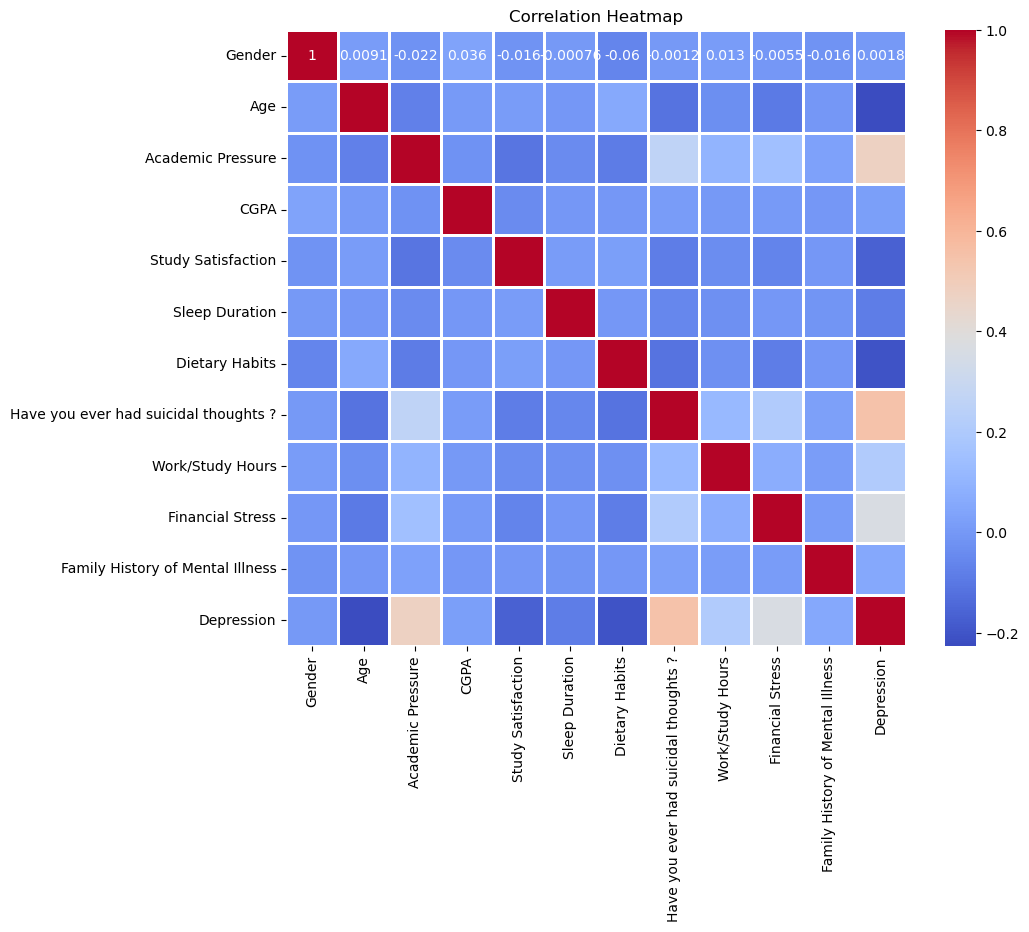

In [14]:
#Defining a correlation matrix to find the correlation
correlation_matrix = df1.corr()

#Creating the heatmap
plt.figure(figsize=(10, 8))  #Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.8)

#Adding labels and title
plt.title('Correlation Heatmap')
plt.show()

With corr value of around 0.5; Academic Pressure leads others for students getting into depression. Financial Stress comes second with corr value of just around 0.4. Nonetheless, Age, Study Satisfaction, Sleep Duration and Dietary Habits act as healing factors.

#### Q2. What significance do academic pressure and lifestyle have on academic progress of the student?

In [15]:
#Preparing the data.
X = df1[['Academic Pressure', 'Sleep Duration', 'Dietary Habits', 'Work/Study Hours']] #Assigning independent variables to X
X = sm.add_constant(X)  #Adding a constant to the model
y = df1['CGPA'] #Assigning dependent variables to y

#Fitting the regression model
model = sm.OLS(y, X).fit()

#Printing the output
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.954
Date:                Thu, 08 May 2025   Prob (F-statistic):            0.00328
Time:                        14:21:25   Log-Likelihood:                -50344.
No. Observations:               27901   AIC:                         1.007e+05
Df Residuals:                   27896   BIC:                         1.007e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.7382      0.03

Interpretation of p-value:

    If p-value ≤ 0.05; it suggests that it has strong significance.
    If p-value > 0.05; it suggest weak significance.

With p-value of 0.000, < 0.5;Academic Pressure soley affects the academic achievements.

#### Q3. Does academic pressure and financial stress provoke self-harm?

In [16]:
group1 = ['Academic Pressure', 'Financial Stress','Have you ever had suicidal thoughts ?']

#Calculating the correlation matrix
correlation_matrix = df1[group1].corr()

#Printing the output
print(correlation_matrix.to_string())

                                       Academic Pressure  Financial Stress  Have you ever had suicidal thoughts ?
Academic Pressure                               1.000000          0.151697                               0.261510
Financial Stress                                0.151697          1.000000                               0.209131
Have you ever had suicidal thoughts ?           0.261510          0.209131                               1.000000


All of the factors are bound to promote self harm.

#### Q4.  Which gender, age group, city and education level are more prone to depression? What are their average sleep duration and study/work hour based on gender?

In [17]:
#Counting the number of depression cases (1: Depressed) for each gender
gender_dep_counts = df1[df1['Depression'] == 1].groupby('Gender').size()

#Printing the depression counts for each gender
print("Depression counts for each gender:")
print(gender_dep_counts)


Depression counts for each gender:
Gender
0    7221
1    9115
dtype: int64


In [18]:
#Locating the row and column indices where 'Less than 5 Kalyan' is present in the Financial Stress
locations = df.isin(["''Less than 5 Kalyan''"])
location1 = locations[locations == True].stack()

#Replacing the inappropriate value with Kalyan.
df['City'] = df['City'].replace("'Less than 5 Kalyan'", 'Kalyan')

In [19]:
#Grouping the data by City and counting the number of depression cases (1 = Depressed)
city_dep_counts = df[df['Depression'] == 1].groupby('City').size()

#Sorting the cities by depression count in descending order
top_3 = city_dep_counts.sort_values(ascending=False).head(3)

#Printing the top 3 cities with the highest number of depression cases
print("Top 3 cities with the highest number of depression cases:")
print(top_3)


Top 3 cities with the highest number of depression cases:
City
Kalyan       934
Hyderabad    897
Srinagar     763
dtype: int64


In [20]:
#Grouping the data by Age and counting the number of depression cases (Depression = 1) for each age group
age_group_dep_counts = df1[df1['Depression'] == 1].groupby('Age').size()

#Sorting the age groups by the number of depression cases in descending order and getting the top 5
top_5_age_groups_by_cases = age_group_dep_counts.sort_values(ascending=False).head(5)

#Printing the top 5 age groups with the highest depression cases
print("Top 5 age groups with the highest number of depression cases:")
for age_group, count in top_5_age_groups_by_cases.items():
    print(f"Age group {age_group}: {count} cases")


Top 5 age groups with the highest number of depression cases:
Age group 20.0: 1579 cases
Age group 24.0: 1509 cases
Age group 28.0: 1308 cases
Age group 18.0: 1216 cases
Age group 21.0: 1169 cases


It appears that students who are over their teenage lives are more vulnerable to depression.

In [21]:
#Grouping the data by Degree and counting the number of depression cases (Depression = 1) for each degree
degree_dep_counts = df[df['Depression'] == 1].groupby('Degree').size()

#Sorting the degree groups by the number of depression cases in descending order
sorted_degree_dep_counts = degree_dep_counts.sort_values(ascending=False)

#Displaying only the top 5 degrees with the highest depression cases
top_5_degrees = sorted_degree_dep_counts.head(5)

# Printing the top 5 degrees with the highest depression cases
print("Top 5 degrees with the highest number of depression cases:")
for degree, count in top_5_degrees.items():
    print(f"Degree: {degree}, Depression cases: {count} cases")


Top 5 degrees with the highest number of depression cases:
Degree: Class 12, Depression cases: 4303 cases
Degree: B.Ed, Depression cases: 1021 cases
Degree: B.Arch, Depression cases: 871 cases
Degree: B.Com, Depression cases: 853 cases
Degree: BCA, Depression cases: 819 cases


In [22]:
#creating  a new dataframe named df2
df2 =df[['Gender','Sleep Duration','Work/Study Hours']]
df2

,Gender,Sleep Duration,Work/Study Hours
0,1,1.0,3.0
1,0,1.0,3.0
2,1,0.0,9.0
3,0,2.0,4.0
4,0,1.0,1.0
...,...,...,...
27896,0,1.0,7.0
27897,1,0.0,0.0
27898,1,1.0,12.0
27899,0,0.0,10.0


In [23]:
#Grouping by Gender and calculating the mean values for Sleep Duration and Work/Study Hours
gdata = df2.groupby('Gender')[['Sleep Duration', 'Work/Study Hours']].mean().reset_index()

#Printing the results
print("Average Sleep Duration and Study/Work Hours by Gender:")
print(gdata)


Average Sleep Duration and Study/Work Hours by Gender:
   Gender  Sleep Duration  Work/Study Hours
0       0        1.399918          7.102882
1       1        1.398186          7.199974


#### Q5.   Does Age, Work/Study Hours and Depression help students in cultivating suicidal tendencies?

In [24]:
#Preparing the data.
X = df1[['Age', 'Work/Study Hours', 'Depression']]  # Assigning independent variables
X = sm.add_constant(X)  #Addding constant to the model
y = df1['Have you ever had suicidal thoughts ?']  #Assigning dependent variable 

#Fitting the logistic regression model
model = sm.Logit(y, X).fit()

#Printing the output
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.502688
         Iterations 6
                                     Logit Regression Results                                    
Dep. Variable:     Have you ever had suicidal thoughts ?   No. Observations:                27901
Model:                                             Logit   Df Residuals:                    27897
Method:                                              MLE   Df Model:                            3
Date:                                   Thu, 08 May 2025   Pseudo R-squ.:                  0.2354
Time:                                           14:21:26   Log-Likelihood:                -14025.
converged:                                          True   LL-Null:                       -18343.
Covariance Type:                               nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

In [25]:
#Selecting the necessary columns
columns_of_interest = ['Age', 'Work/Study Hours', 'Depression', 'Have you ever had suicidal thoughts ?']

#Calculating the correlation matrix for the selected columns
correlation_matrix = df1[columns_of_interest].corr()

#Printing the output
print(correlation_matrix)

                                            Age  Work/Study Hours  Depression  \
Age                                    1.000000         -0.032928   -0.226422   
Work/Study Hours                      -0.032928          1.000000    0.208563   
Depression                            -0.226422          0.208563    1.000000   
Have you ever had suicidal thoughts ? -0.113502          0.121315    0.546277   

                                       Have you ever had suicidal thoughts ?  
Age                                                                -0.113502  
Work/Study Hours                                                    0.121315  
Depression                                                          0.546277  
Have you ever had suicidal thoughts ?                               1.000000  


### 9. Conclusion

#### Data Clarity

1. Suitable data for the research of mental health conditions of students.
2. Some values are categorized as objects which should be infact numericals.
3. Low presence of irrelevant values which can be easily sorted out.

#### Major takeaways from EDA

1. Family history of mental illness doesn't foster depression and suicidal ideas.
2. Male students suffer from mental stress more than female students.
3. Engagement of students in work and study tends to alleviate mental health problems.
4. Students who have just graduated their highschool seem to suffer from depression.
5. Financial and academic pressure are the main contributers of depression.